In [70]:
import sys
import numpy as np
import scipy.spatial.distance as dist
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from __future__ import print_function, division
import pandas as pd
%matplotlib inline
 
def label_cluster_num(means, mesh_points, metrics):
    '''
    Args:
        means(list)  : 母点の座標
        mesh_points  : 平面の全座標
        metrics(func): 距離関数(scipy) 
    '''
    def label(point):
        '''
        meansは配列で、その要素をlambdaのmeanとしてmetricsへ順に渡し、mapでリスト化。
        距離関数に各母点とそのポイントの距離を計算したリストができるので、argminで
        最小値となった母点のインデックスを返す（=cluster番号）
        '''
        cluster_label = np.argmin(list(map(lambda mean: metrics(mean, point), means)))
        return point, cluster_label
    '''
    mesh_pointsに入った各座標をlabel関数に渡して、その座標がどのクラスタに
    属するかのラベルをつけ、リストを返す
    '''
    return list(map(label, mesh_points))

def show_voronoi_with_metrics(metrics):
    labeled_mesh_points = label_cluster_num(centroids, mesh_points, metrics=metrics)
    plt.figure()
    fig, ax = plt.subplots()
 
    ax.set_aspect('equal')
    ax.grid(True, which='both')
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    ax.set_xlim([-10, 10])
    ax.set_ylim([-10, 10])
 
    for i in range(0, len(centroids)):
        cluster_points = [point for point, label in labeled_mesh_points if label==i]
        
        xp = [xy[0] for xy in cluster_points]
        yp = [xy[1] for xy in cluster_points]
        ax.scatter(xp, yp, color=cm.prism(i / float(len(centroids))), marker='.')
        
    ax.scatter([cent[0] for cent in centroids], [cent[1] for cent in centroids], color="g", marker='o')
    
    plt.show()

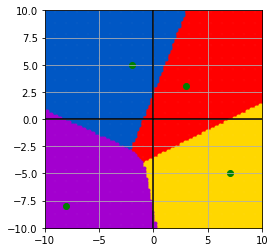

In [98]:
centroids = np.array([[3, 3], [-2, 5], [7, -5], [-8, -8]])
xs = np.linspace(-10, 10, 100)
ys = np.linspace(-10, 10, 100)
xx, yy = np.meshgrid(xs, ys)
mesh_points = np.c_[xx.ravel(), yy.ravel()]

show_voronoi_with_metrics(dist.euclidean)

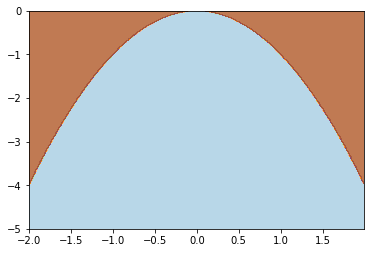

In [57]:
# methgridとnp.c_を使って全座標の色づけを行う

x = np.arange(10)
y = np.arange(0,20,2)

# meshgridで2つの配列の行列成分の全組み合わせを作成する
# np.tile(x, (len(y),1))とnp.tile(y, (len(x), 1))をそれぞれ出力する感じ
xx, yy = np.meshgrid(x, y)
# ravelで行列を行方向につなぎ、1次元にする
# c_で1次元になった二つの配列から同じ成分同士を抜き出し、n行2列の行列を作る
ret = np.c_[xx.ravel(), yy.ravel()]

# x^2の座標を作る
x = np.arange(-2, 2, 0.01)
x2 = x**2
# yの座標を作る
y = np.arange(-5, 0, 0.01)

# meshgridは境界線の座標を作るのではなく、全ての座標の値を出して、そこを色づけすることにより、領域を可視化する
xx,yy = np.meshgrid(x2, y)

arg = np.c_[xx.ravel(), yy.ravel()]
ret = np.sum(arg, axis=1) # 各点でx^2+yを行う.200000個の要素ができる

# x軸(400成分)とy軸(500成分)を設定し、x^2+yで得た200000座標の値が>0となる空間を指定して色づけする
plt.contourf(x, y, ret.reshape(xx.shape)>0, cmap=plt.cm.Paired, alpha=0.8)
plt.show()